In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import utils 

Caricamento dei datasets

In [6]:
#Carico i datasets
audio_files_target = utils.load_dataset('Dataset/Target')
audio_files_nonTarget = utils.load_dataset('Dataset/Non-Target')   

Estrazione delle frequenze di campionamento e plot delle stesse

2000 200000
600 384000


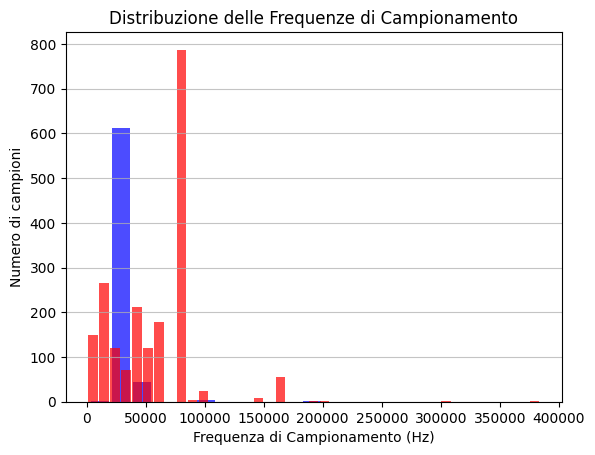

In [3]:
#TODO analisi per il resembling shannon Nyquist 
frequenciesTarget = utils.extractFrequencies(audio_files_target)
frequenciesNonTarget = utils.extractFrequencies(audio_files_nonTarget)
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)

utils.plotFrequencies(frequenciesTarget,frequenciesNonTarget)

Caricamento dataset nel dataframe

In [7]:
df_paths, df_names = utils.create_dataframe_from_files("Dataset")

In [8]:
df_paths, df_names

(                                               FilePath
 0                                 Dataset\duplicate.txt
 1                        Dataset\duplicate_indices.json
 2     Dataset\Non-Target\Ambient Noise\0f9867d8-fcf7...
 3     Dataset\Non-Target\Ambient Noise\2b68b3a9-7c0d...
 4     Dataset\Non-Target\Ambient Noise\2f574049-3325...
 ...                                                 ...
 2660  Dataset\Target\Vessel\SanctSound_OC01_03_ship_...
 2661  Dataset\Target\Vessel\SanctSound_OC02_01_ship_...
 2662  Dataset\Target\Vessel\SanctSound_OC03_02_ship_...
 2663  Dataset\Target\Vessel\SanctSound_SB03_09_vesse...
 2664               Dataset\Target\Vessel\ship_small.mp3
 
 [2665 rows x 1 columns],
                                             FileName
 0                                      duplicate.txt
 1                             duplicate_indices.json
 2           0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3
 3           2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3
 4           2f574

Ricerca ed eliminazione dei duplicati

In [9]:
duplicate_indices = utils.find_duplicates(df_names)
print(duplicate_indices)

{'72021005.wav': [107, 213], '7202100T.wav': [108, 215], '7202100V.wav': [109, 216], '7202100Z.wav': [110, 217], '7702800U.wav': [958, 1565], '7702800V.wav': [959, 1566], '7702800X.wav': [960, 1567], '7702801F.wav': [966, 1568], '7702801M.wav': [969, 1569], '78018002.wav': [112, 218], '78018003.wav': [113, 219], '7801800B.wav': [115, 220], '7801800D.wav': [116, 221], '7801800H.wav': [117, 222], '7801800J.wav': [118, 223], '84016002.wav': [1465, 1577], '8401600B.wav': [1466, 1578], '84021003.wav': [1234, 1581], '91012009.wav': [1002, 1605], '9101200B.wav': [1003, 1606], '9101200K.wav': [1006, 1607], '9101201E.wav': [1011, 1608], '91012022.wav': [1017, 1609], '91012048.wav': [1046, 1610], '91012049.wav': [1047, 1611]}


Salvataggio del dizionario in un file json

In [10]:
import json

# Convert the dictionary to a JSON string
duplicate_indices_json = json.dumps(duplicate_indices)

# Write the JSON string to a file
with open('Dataset/duplicate_indices.json', 'w') as f:
    f.write(duplicate_indices_json)

Eliminazione duplicati

In [11]:
# Remove the duplicate rows
df_paths, df_names = utils.remove_rows(df_paths, df_names, 'Dataset/duplicate.txt', 'Dataset/df_paths.csv', 'Dataset/df_names.csv')

In [12]:
df_names, df_paths

(                                            FileName
 0                                      duplicate.txt
 1                             duplicate_indices.json
 2           0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3
 3           2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3
 4           2f574049-3325-446c-a8ac-2e5b31e9e32f.mp3
 ...                                              ...
 2660    SanctSound_OC01_03_ship_20191106T223751Z.wav
 2661    SanctSound_OC02_01_ship_20190419T233040Z.wav
 2662    SanctSound_OC03_02_ship_20200228T080107Z.wav
 2663  SanctSound_SB03_09_vessel_20200415T161235Z.wav
 2664                                  ship_small.mp3
 
 [2638 rows x 1 columns],
                                                FilePath
 0                                 Dataset\duplicate.txt
 1                        Dataset\duplicate_indices.json
 2     Dataset\Non-Target\Ambient Noise\0f9867d8-fcf7...
 3     Dataset\Non-Target\Ambient Noise\2b68b3a9-7c0d...
 4     Dataset\Non-Target\Ambient Noise

In [13]:
#TODO dirgli di aggiornare il file di metadata, ci sono 1973 file su 2638
# TODO Vedere la frequenza massima di ogni audio,analisi canali e bitrate, e controllare il contenuto di tali frequenze e decidere se continuare ad abbassare il range di frequenze. Cercare di ridurre il più possibile. Secondo benedetto 192Khz.  

Estrazione delle durate degli audio e plot della distribuzione delle stesse

In [14]:
audio_durations = utils.extract_durations('Dataset/df_paths.csv')

In [15]:
audio_durations

[31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 20.0,
 9.99297052154195,
 8.668526077097505,
 10.29297052154195,
 9.993015873015873,
 19.993015873015874,
 37.24267573696145,
 5.0,
 11.00625850340136,
 3.528027210884354,
 3.528027210884354,
 3.528027210884354,
 1.7639909297052154,
 1.7639909297052154,
 1.7639909297052154,
 3.528027210884354,
 2.646031746031746,
 3.528027210884354,
 1.222721088435374,
 1.5208163265306123,
 1.2325170068027211,
 1.1168707482993196,
 1.166485260770975,
 1.4574603174603176,
 1.096780045351474,
 1.7937414965986394,
 1.4622222222222223,
 0.8645804988662131,
 0.9822222222222222,
 1.8723356009070296,
 1.330204081632653,
 1.3526077097505669,
 1.451111111111111,
 58.623174603174604,
 1.9212244897959183,
 1.7978231292517006,
 1.6121995464852608,
 1.6651700680272108,
 1.6824489795918367,
 1.5510204081632653,
 1.339501133786848,
 1.4241269841269841,
 1.5369160997732427,
 1.2408163265306122,
 1.5792290249433107

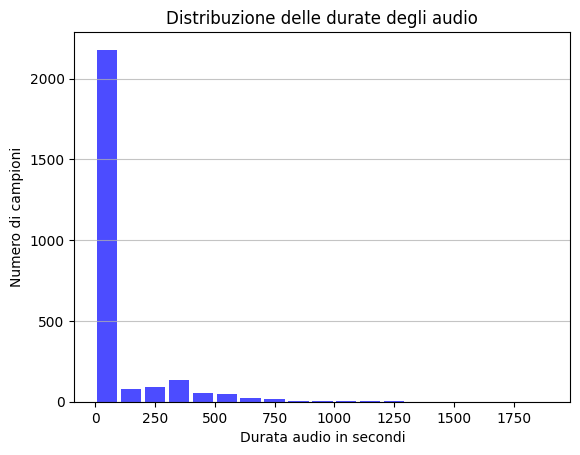

In [16]:
utils.plot_durations(audio_durations)

Il trim andrebbe fatto intorno ai 750 secondi? La maggior parte dei campioni è distribuita entro quel valore

Analisi delle frequenze

In [2]:
import os
import glob

def get_audio_files(dfpath):
    # Initialize an empty list to store the file paths
    audio_files = []

    df = pd.read_csv(dfpath)

    df = df[df['FilePath'].str.endswith(('.wav', '.mp3'))]

    # Traverse the directory
    for percorso_file in df['FilePath']:
        audio_files.append(percorso_file)

    return audio_files

In [3]:
audio_files = get_audio_files('Dataset/df_paths.csv')
audio_files

['Dataset\\Non-Target\\Ambient Noise\\0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3',
 'Dataset\\Non-Target\\Ambient Noise\\2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3',
 'Dataset\\Non-Target\\Ambient Noise\\2f574049-3325-446c-a8ac-2e5b31e9e32f.mp3',
 'Dataset\\Non-Target\\Ambient Noise\\30679527-fd7a-4cad-8c7d-cb1bcc07604d.mp3',
 'Dataset\\Non-Target\\Ambient Noise\\f9652ad2-39f5-41b4-a8e4-89171a864f03.mp3',
 'Dataset\\Non-Target\\Antarctic Minke Whale\\Bioduck.wav',
 'Dataset\\Non-Target\\Arnoux’s Beaked Whale\\Arnoux-beaked-whales-rogers-1.wav',
 'Dataset\\Non-Target\\Arnoux’s Beaked Whale\\Arnoux-beaked-whales-rogers-2.wav',
 'Dataset\\Non-Target\\Arnoux’s Beaked Whale\\Arnoux-beaked-whales-rogers-3.wav',
 'Dataset\\Non-Target\\Arnoux’s Beaked Whale\\Arnoux-beaked-whales-rogers-4.wav',
 'Dataset\\Non-Target\\Arnoux’s Beaked Whale\\Arnoux-beaked-whales-rogers-5.wav',
 'Dataset\\Non-Target\\Arnoux’s Beaked Whale\\Arnoux-beaked-whales-rogers-6.wav',
 'Dataset\\Non-Target\\Atlantic cod\\SanctS

In [20]:
import librosa

def analyze_frequencies(audio_files):
    frequencies = []
    for file in audio_files:
        # Load the audio file
        y, sr = librosa.load(file, mono=True)  # Ensure the audio is mono

        # Skip if the audio is too short
        if len(y) < 2048:
           print(f"Skipping {file} because it's too short")
           continue

        # Compute the spectral centroid frequencies
        spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)

        # Append the mean frequency to the list
        frequencies.append(spectral_centroids.mean())

    return frequencies

In [21]:
frequencies = analyze_frequencies(audio_files)

Skipping Dataset\Non-Target\Harbor porpoise\Risch-x001speed-amplified-harbor-porpoise-clip-fixed.mp3 because it's too short
Skipping Dataset\Non-Target\Melon Headed Whale\9101203U.wav because it's too short
Skipping Dataset\Non-Target\Melon Headed Whale\9101203X.wav because it's too short
Skipping Dataset\Non-Target\Melon Headed Whale\91012041.wav because it's too short
Skipping Dataset\Non-Target\Melon Headed Whale\91012045.wav because it's too short


In [22]:
# frequenze con mono = True
frequencies

[2500.307865940108,
 3221.17768956704,
 3830.0505695980755,
 4030.4001567167857,
 3393.411582488014,
 179.98602964943447,
 5036.834679421797,
 4601.190031943484,
 5115.709301415825,
 4384.898131506604,
 3888.774895084326,
 4799.597142059379,
 3488.7671510285454,
 1056.3406418458524,
 2717.238241934112,
 3439.219918773399,
 2904.6120396411143,
 3629.6042696799445,
 2669.32318540643,
 3137.0798057906163,
 3406.4739200469294,
 2886.2574548531256,
 2692.6194766591534,
 6028.742436592088,
 5697.907678978914,
 6085.907232973321,
 6169.363340744221,
 6238.4797601588825,
 5840.260028075436,
 6509.931746325036,
 6193.4591811717655,
 6359.100881747587,
 6986.323785861179,
 5966.147627435246,
 6814.41049875755,
 6233.313763800263,
 6363.012381788608,
 6020.871624942462,
 3991.907868139577,
 4420.1325805685165,
 4438.7171651157405,
 4976.964416925635,
 4799.618121061202,
 4778.817583251044,
 5578.773811839419,
 6591.82458317146,
 5662.029663417237,
 5776.259115645432,
 5955.570866053437,
 5122.091

In [23]:
frequencies # frequenze senza mono

[2500.307865940108,
 3221.17768956704,
 3830.0505695980755,
 4030.4001567167857,
 3393.411582488014,
 179.98602964943447,
 5036.834679421797,
 4601.190031943484,
 5115.709301415825,
 4384.898131506604,
 3888.774895084326,
 4799.597142059379,
 3488.7671510285454,
 1056.3406418458524,
 2717.238241934112,
 3439.219918773399,
 2904.6120396411143,
 3629.6042696799445,
 2669.32318540643,
 3137.0798057906163,
 3406.4739200469294,
 2886.2574548531256,
 2692.6194766591534,
 6028.742436592088,
 5697.907678978914,
 6085.907232973321,
 6169.363340744221,
 6238.4797601588825,
 5840.260028075436,
 6509.931746325036,
 6193.4591811717655,
 6359.100881747587,
 6986.323785861179,
 5966.147627435246,
 6814.41049875755,
 6233.313763800263,
 6363.012381788608,
 6020.871624942462,
 3991.907868139577,
 4420.1325805685165,
 4438.7171651157405,
 4976.964416925635,
 4799.618121061202,
 4778.817583251044,
 5578.773811839419,
 6591.82458317146,
 5662.029663417237,
 5776.259115645432,
 5955.570866053437,
 5122.091

In [24]:
import matplotlib.pyplot as plt

def plot_frequencies(frequencies):
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies)
    plt.title('Frequencies')
    plt.xlabel('Audio Files')
    plt.ylabel('Frequency')
    plt.show()


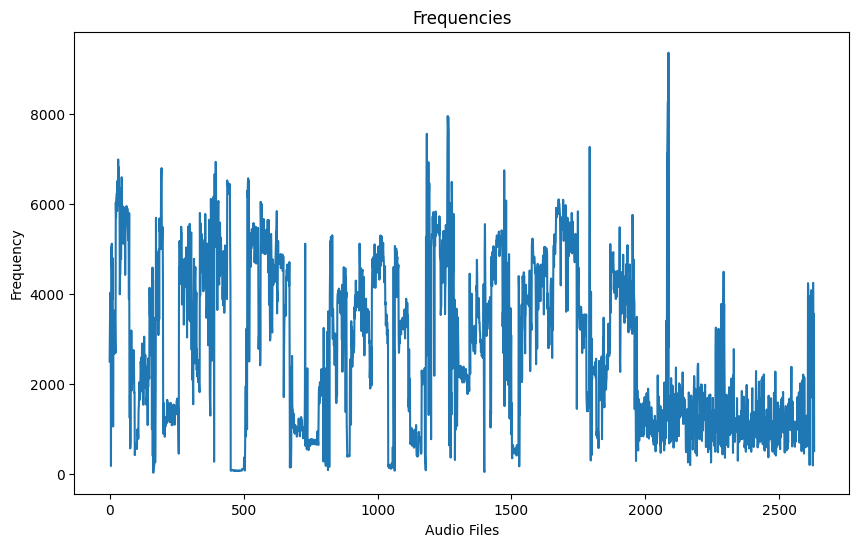

In [25]:
# frequenze senza mono
plot_frequencies(frequencies)

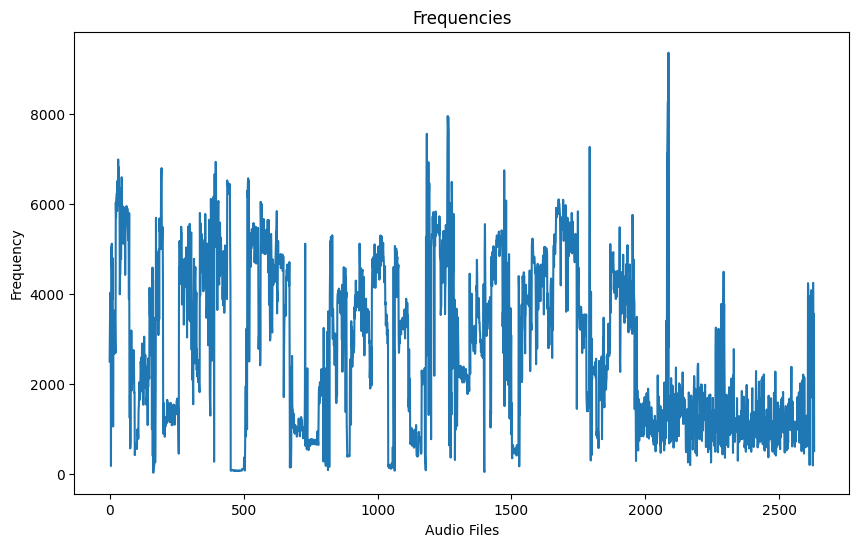

In [26]:
# frequenze con mono = True
plot_frequencies(frequencies)

Promemoria: gli audio troppo corti sono stati saltati. va bene come cosa? 

In [27]:
import librosa
import matplotlib.pyplot as plt

def analyze_max_frequencies_and_plot(audio_files):
    max_frequencies = []
    for file in audio_files:
        # Load the audio file
        y, sr = librosa.load(file, mono=True)  # Ensure the audio is mono

        # Skip if the audio is too short
        if len(y) < 2048:
            print(f"Skipping {file} because it's too short")
            continue

        # Compute the spectral centroid frequencies
        spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)

        # Append the max frequency to the list
        max_frequencies.append(np.max(spectral_centroids))

    # Plot the max frequencies
    plt.figure(figsize=(10, 6))
    plt.plot(max_frequencies)
    plt.title('Max Frequencies')
    plt.xlabel('Audio Files')
    plt.ylabel('Max Frequency')
    plt.show()
    
    return max_frequencies

Skipping Dataset\Non-Target\Harbor porpoise\Risch-x001speed-amplified-harbor-porpoise-clip-fixed.mp3 because it's too short
Skipping Dataset\Non-Target\Melon Headed Whale\9101203U.wav because it's too short
Skipping Dataset\Non-Target\Melon Headed Whale\9101203X.wav because it's too short
Skipping Dataset\Non-Target\Melon Headed Whale\91012041.wav because it's too short
Skipping Dataset\Non-Target\Melon Headed Whale\91012045.wav because it's too short


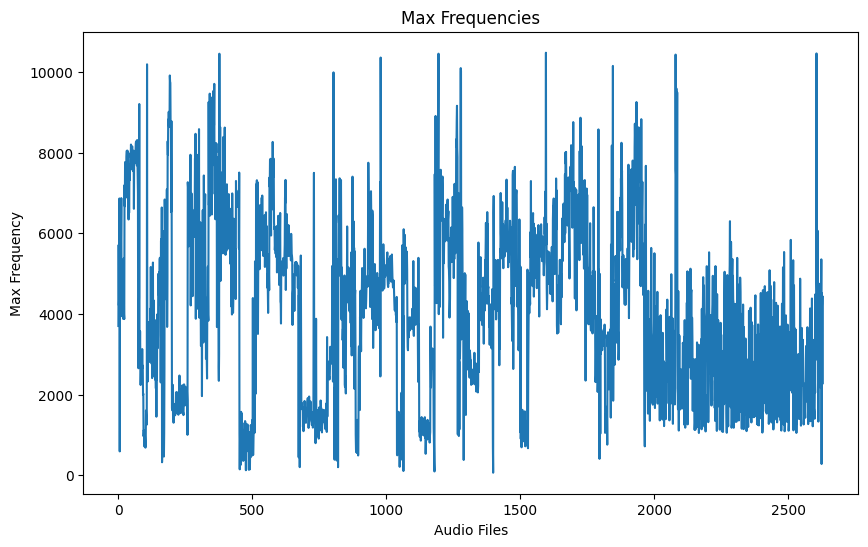

In [28]:
max_frequencies = analyze_max_frequencies_and_plot(audio_files)

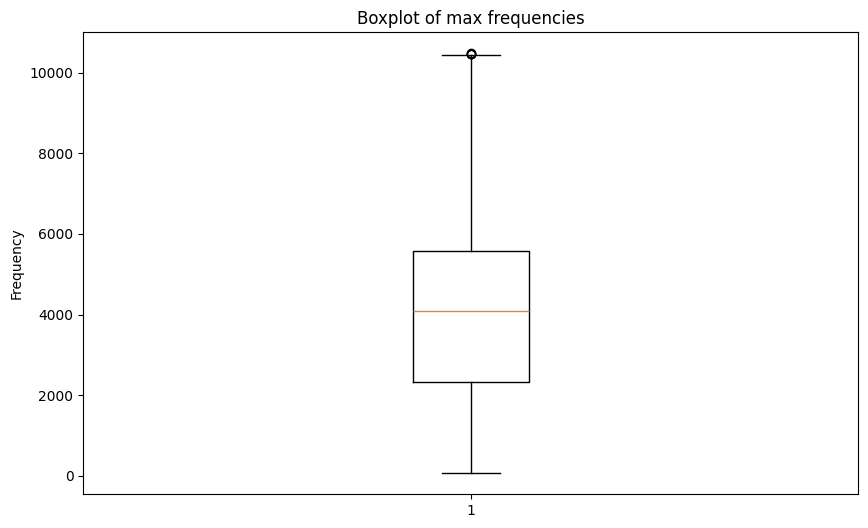

In [29]:
plt.figure(figsize=(10, 6))
plt.boxplot(max_frequencies)
plt.title('Boxplot of max frequencies')
plt.ylabel('Frequency')
plt.show()

In [30]:
import soundfile as sf
import matplotlib.pyplot as plt

def analyze_channels_and_plot(audio_files):
    channels = []
    two_channel_files = []
    for file in audio_files:
        # Read the audio file
        data, samplerate = sf.read(file)

        # Get the number of channels (2 for stereo, 1 for mono)
        num_channels = 1 if len(data.shape) == 1 else data.shape[1]

        # Append the number of channels to the list
        channels.append(num_channels)

        # If the file has 2 channels, add it to the list
        if num_channels == 2:
            two_channel_files.append(file)

    # Plot the number of channels
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(channels, bins=[1, 2, 3], align='left', rwidth=0.8)
    plt.title('Number of Channels')
    plt.xlabel('Channels')
    plt.ylabel('Count')
    plt.xticks([1, 2])

    # Add labels to the histogram bars
    for count, bin, patch in zip(counts, bins, patches):
        plt.text(bin, count, str(int(count)), color='black', ha='center', va='bottom')

    plt.show()

    # Print the paths of the files that have 2 channels
    print("Files with 2 channels:")
    for file in two_channel_files:
        print(file)

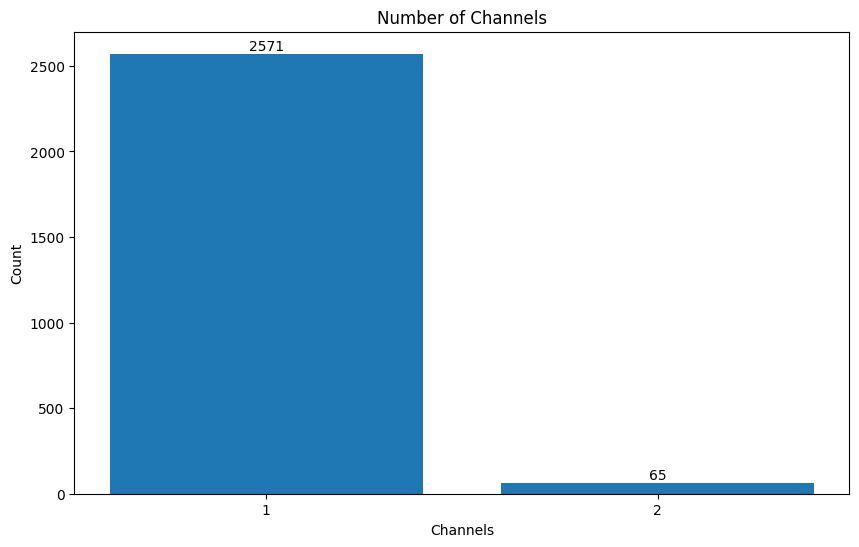

Files with 2 channels:
Dataset\Non-Target\Atlantic croaker\Croaker.wav
Dataset\Non-Target\Bar jack\Bar-Jack.wav
Dataset\Non-Target\Barred Grunt\Barred-Grunt.wav
Dataset\Non-Target\Bearded Seal\Bearded_Seal.wav
Dataset\Non-Target\Beluga, White Whale\BelugasHunting.wav
Dataset\Non-Target\Black Drum\Black-Drum.wav
Dataset\Non-Target\Bowhead Whale\BowheadWhale.wav
Dataset\Non-Target\Cuvier's beaked whale\Beaked-Whale-3.wav
Dataset\Non-Target\Cuvier's beaked whale\Beaked-Whale-Buzz-2.wav
Dataset\Non-Target\Dolphin\StenellaBlueDolphin.wav
Dataset\Non-Target\Earthquake\earthquake_sound (1).mp3
Dataset\Non-Target\Fin, Finback Whale\atlfin.mp3
Dataset\Non-Target\Gray whale\GreyWhale.wav
Dataset\Non-Target\Harbor Seals\harbor-seal-in-air.wav
Dataset\Non-Target\Harbor Seals\harborseal-underwater.wav
Dataset\Non-Target\Humpback Whale\akhumphi1x.mp3
Dataset\Non-Target\Humpback Whale\Humpback-Calf-whispering-Peer-Madsen.wav
Dataset\Non-Target\Humpback Whale\Humpback.wav
Dataset\Non-Target\Killer Wha

In [31]:
analyze_channels_and_plot(audio_files)

In [4]:
from pydub.utils import mediainfo

def analyze_bitrate(audio_files):
    bitrates = []
    for file in audio_files:
        # Get the media info of the audio file
        info = mediainfo(file)

        # Get the bitrate
        bitrate = int(info['bit_rate'])

        # Append the bitrate to the list
        bitrates.append(bitrate)

    return bitrates

In [5]:
bitrates = analyze_bitrate(audio_files)

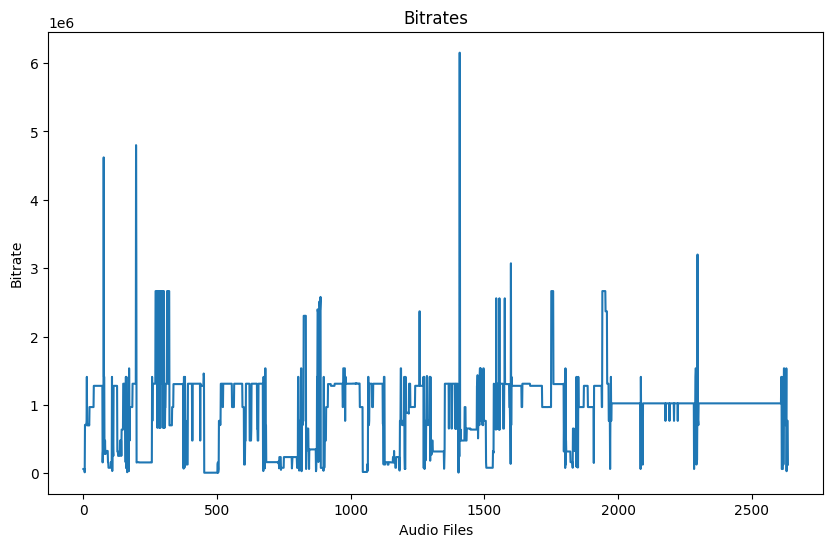

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(bitrates)
plt.title('Bitrates')
plt.xlabel('Audio Files')
plt.ylabel('Bitrate')
plt.show()